In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Get the current directory and the processed directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
processed_dir = os.path.join(parent_dir, 'processed')

# Get the list of pickle files in the processed directory
pklfiles = [f for f in os.listdir(processed_dir) if f.endswith('.pkl')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each pickle file
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    
    # Combine the data with the existing data
    combined_data = pd.concat([combined_data, data], ignore_index=True)

# Sort the combined data by filename
combined_data = combined_data.sort_values(by='filename')



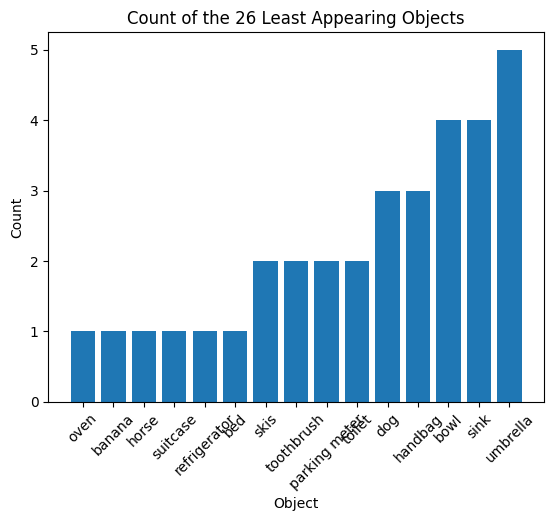

{'toilet': [('ad-be', 'img00972.jpeg'), ('ad-be', 'img01569.jpeg')], 'dog': [('ad-cdu', 'img00001.jpeg'), ('ad-cdu', 'img00002.jpeg'), ('il-be', 'img00001.jpeg')], 'sink': [('ad-cdu', 'img01977.jpeg'), ('ad-cdu', 'img01978.jpeg'), ('ad-livre', 'img01022.jpeg'), ('ad-livre', 'img01023.jpeg')], 'bowl': [('ad-chega', 'img00002.jpeg'), ('ad-ps', 'img04908.jpeg'), ('chega-ps', 'img00005.jpeg'), ('il-cdu', 'img00005.jpeg')], 'umbrella': [('ad-chega', 'img01093.jpeg'), ('ad-chega', 'img01094.jpeg'), ('ad-ps', 'img03207.jpeg'), ('cdu-be', 'img00510.jpeg'), ('cdu-be', 'img00958.jpeg')], 'handbag': [('ad-livre', 'img00705.jpeg'), ('be-ps', 'img02169.jpeg'), ('chega-ps', 'img01905.jpeg')], 'skis': [('ad-pan', 'img01781.jpeg'), ('il-ps', 'img01230.jpeg')], 'toothbrush': [('cdu-ps', 'img00003.jpeg'), ('livre-cdu', 'img00003.jpeg')], 'refrigerator': [('chega-cdu', 'img00566.jpeg')], 'banana': [('chega-cdu', 'img00635.jpeg')], 'bed': [('chega-ps', 'img02325.jpeg')], 'suitcase': [('il-cdu', 'img00918.

In [3]:
# Extract object labels
import seaborn as sns

all_detections = [detection for detections in combined_data['detections'] for detection in detections]
labels = [detection[4] for detection in all_detections]

# Count occurrences of each label
label_counts = pd.Series(labels).value_counts()

# Get the 26 least appearing objects
least_appearing_objects = label_counts.nsmallest(15)

# Plot histogram for the 26 least appearing objects
plt.bar(least_appearing_objects.index, least_appearing_objects.values)
plt.xlabel('Object')
plt.ylabel('Count')
plt.title('Count of the 26 Least Appearing Objects')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

# Initialize an empty dictionary to store the mapping
object_frame_mapping = {}

# Iterate through each pickle file again
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')
    # Iterate through each detection in the data
    for index, row in data.iterrows():
        filename = pklfile[:-4]  # Remove the '.pkl' extension to get the video name
        detections = row['detections']
        
        
        for frame_number, detection in enumerate(detections, start=1):
            object_label = detection[4]
            
            
            if object_label in least_appearing_objects.index:
                # Add the video name and frame number to the dictionary
                if object_label not in object_frame_mapping:
                    object_frame_mapping[object_label] = []
                object_frame_mapping[object_label].append((filename, row['filename']))


print(object_frame_mapping)

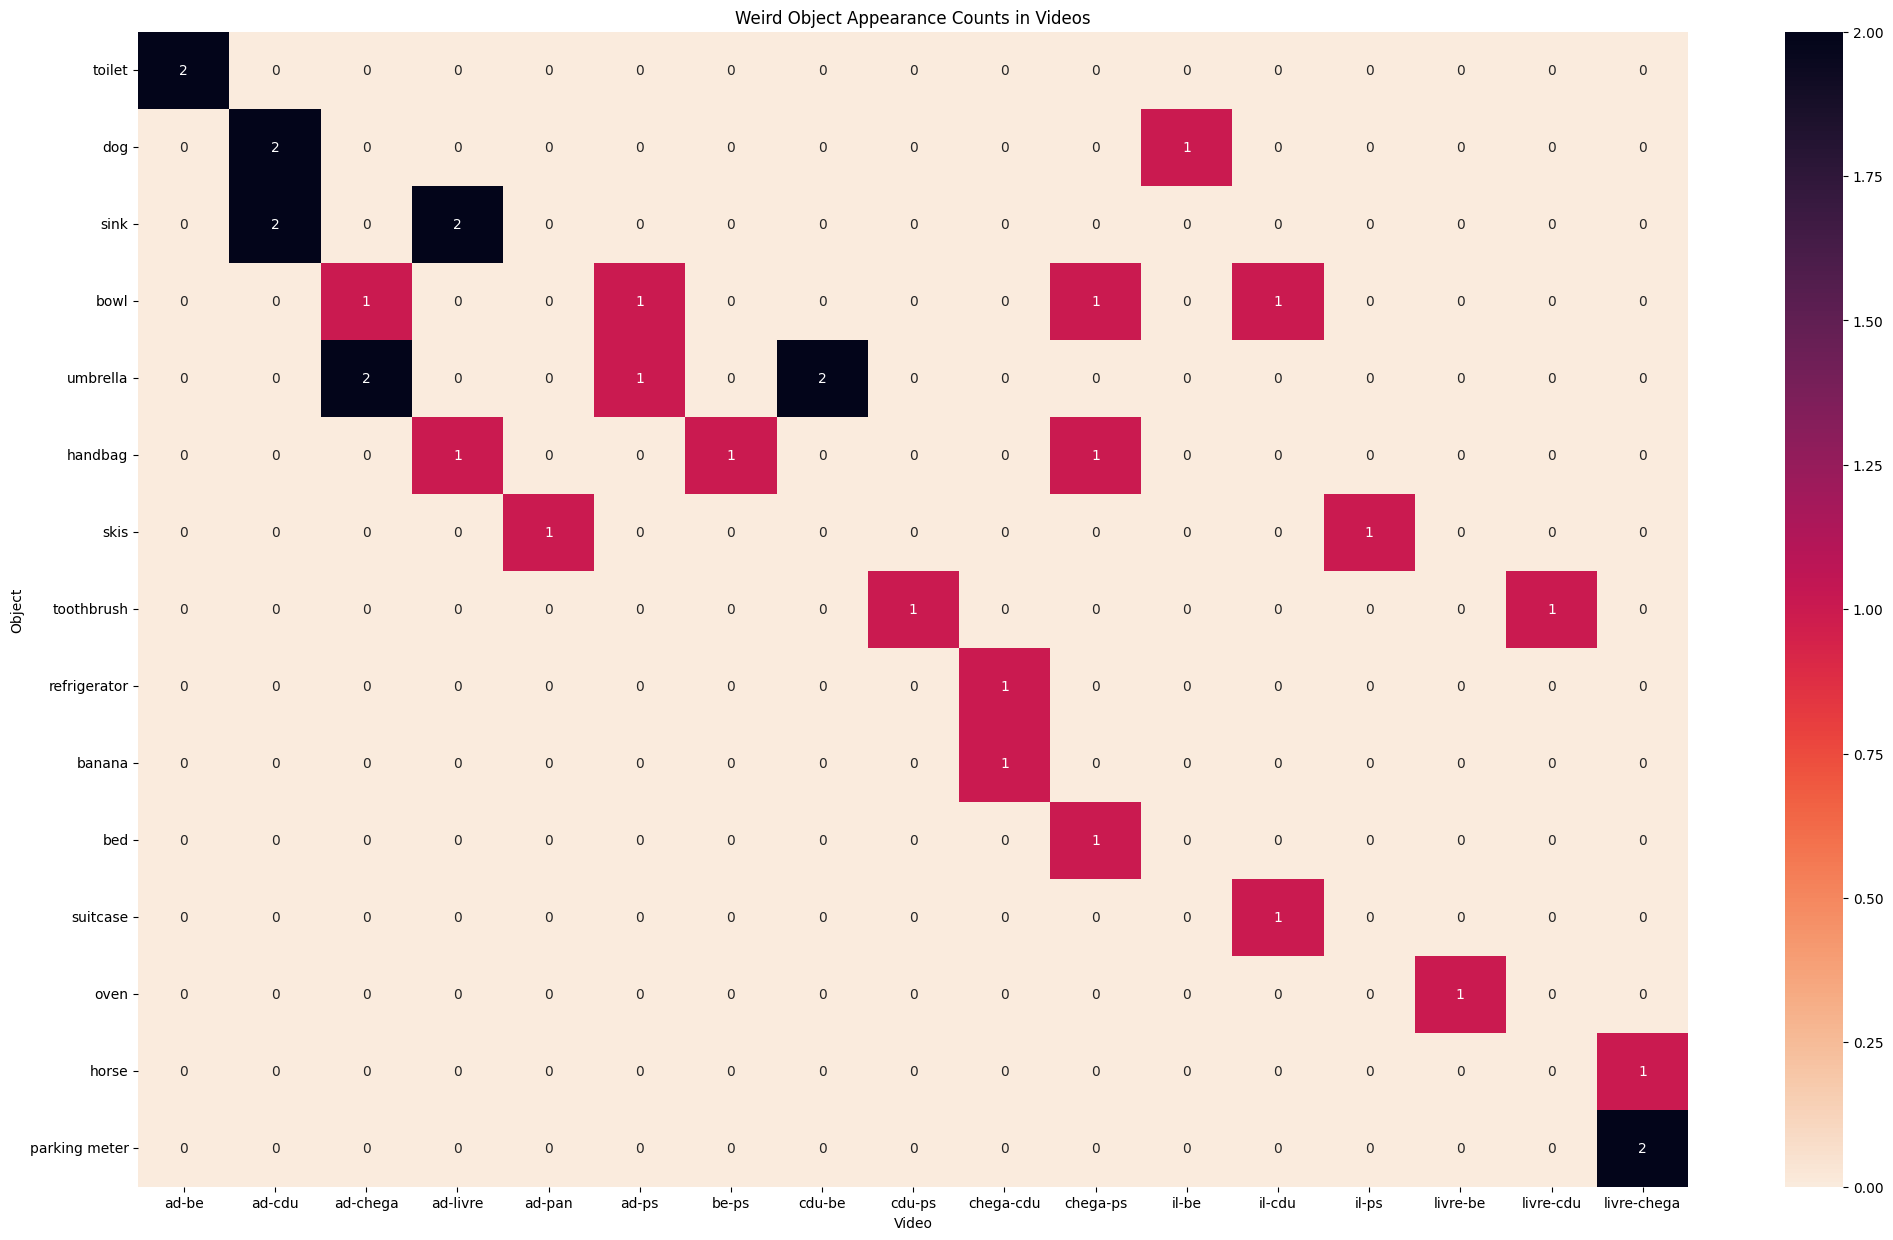

In [4]:
videos = sorted(set([video for video, _ in sum(object_frame_mapping.values(), [])]))

# Initialize an empty dictionary to store object counts per video
object_counts = {video: {obj: 0 for obj in object_frame_mapping.keys()} for video in videos}

# Populate object counts
for obj, video_frames in object_frame_mapping.items():
    for video, frame in video_frames:
        object_counts[video][obj] += 1

# Convert object_counts to a DataFrame
df_counts = pd.DataFrame(object_counts)

cmap = sns.cm.rocket_r
# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df_counts, cmap=cmap, cbar=True, annot=True, fmt='g')
plt.xlabel('Video')
plt.ylabel('Object')
plt.title('Weird Object Appearance Counts in Videos')
plt.show()


Object Density 

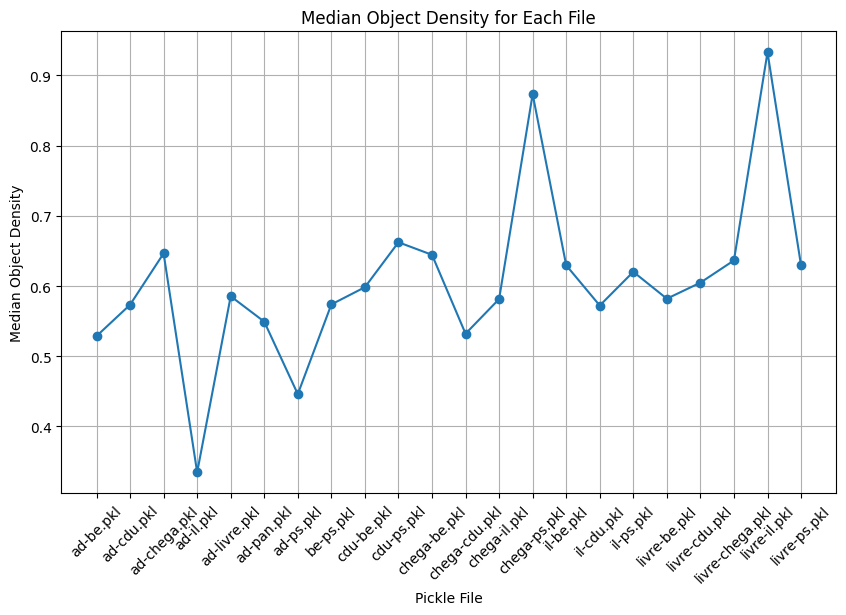

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Get the current directory and the processed directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
processed_dir = os.path.join(parent_dir, 'processed')

# Get the list of pickle files in the processed directory
pklfiles = [f for f in os.listdir(processed_dir) if f.endswith('.pkl')]

width,height = 1280,720

# Initialize a list to store the median object density for each file
median_densities = []

# Iterate through each pickle file
for pklfile in pklfiles:
    object_densities = []
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))

    data = data.sort_values(by='filename')

    for frame in range(len(data)):

        total_object_area = 0

        for detection in data.iloc[frame]['detections']:
            x, y, w, h = detection[:4]
            object_area = w * h
            total_object_area += object_area
       

        frame_area = width * height
        object_density = total_object_area / frame_area
        object_densities.append(object_density)

    # Calculate the median object density for the current file
    median_density = np.median(object_densities)
    median_densities.append(median_density)

# Plot the median object density for each file
plt.figure(figsize=(10, 6))
plt.plot(pklfiles, median_densities, marker='o', linestyle='-')
plt.xlabel('Pickle File')
plt.ylabel('Median Object Density')
plt.title('Median Object Density for Each File')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Object Size Distribution

In [6]:
import os
import pandas as pd

# Define the width and height of the frame
width, height = 1280, 720

# Initialize lists to store statistics for each file
file_names = []
smallest_widths = []
smallest_heights = []
largest_widths = []
largest_heights = []
median_widths = []
median_heights = []

# Iterate through each pickle file
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')

    # Initialize lists to store object sizes for the current file
    widths = []
    heights = []

    # Iterate through each frame in the file
    for frame_data in data['detections']:
        for detection in frame_data:
            x, y, w, h = detection[:4]
            widths.append(w)
            heights.append(h)

    # Calculate statistics for object sizes
    min_width = min(widths)
    min_height = min(heights)
    max_width = max(widths)
    max_height = max(heights)
    median_width = np.median(widths)
    median_height = np.median(heights)

    # Append statistics to the lists
    file_names.append(pklfile)
    smallest_widths.append(min_width)
    smallest_heights.append(min_height)
    largest_widths.append(max_width)
    largest_heights.append(max_height)
    median_widths.append(median_width)
    median_heights.append(median_height)

# Create a DataFrame to store the statistics
size_stats = pd.DataFrame({
    'File': file_names,
    'Smallest Width': smallest_widths,
    'Smallest Height': smallest_heights,
    'Largest Width': largest_widths,
    'Largest Height': largest_heights,
    'Median Width': median_widths,
    'Median Height': median_heights
})

# Display the DataFrame
print(size_stats)

# Visualize the distribution of object sizes (width and height) using histograms or boxplots
# You can use libraries like Matplotlib or Seaborn for visualization


               File  Smallest Width  Smallest Height  Largest Width  \
0         ad-be.pkl              73               67           1107   
1        ad-cdu.pkl              73               74           1242   
2      ad-chega.pkl              61               70           1280   
3         ad-il.pkl              50               69            846   
4      ad-livre.pkl              71               73           1086   
5        ad-pan.pkl              64               57           1267   
6         ad-ps.pkl              35               43           1267   
7         be-ps.pkl              69               49           1266   
8        cdu-be.pkl              59               74           1280   
9        cdu-ps.pkl              65               72           1267   
10     chega-be.pkl              64               77           1196   
11    chega-cdu.pkl              79               60           1266   
12     chega-il.pkl              62               35           1195   
13    

In [7]:
# Detection Confidence Distribution


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize a dictionary to store confidence scores for each class
class_confidence_scores = {}

# Iterate through each pickle file
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')

    # Iterate through each frame in the file
    for frame_data in data['detections']:
        for detection in frame_data:
            # Extract class label and confidence score from the detection
            class_label = detection[4]
            confidence_score = detection[5]
            
            # Add confidence score to the list for the corresponding class
            if class_label not in class_confidence_scores:
                class_confidence_scores[class_label] = []
            class_confidence_scores[class_label].append(confidence_score)

# Calculate median confidence score for each class
median_confidence_by_class = {}
for class_label, scores in class_confidence_scores.items():
    median_confidence_by_class[class_label] = np.median(scores)

# Sort classes by median confidence score in descending order
sorted_classes = sorted(median_confidence_by_class.items(), key=lambda x: x[1], reverse=True)

# Print median confidence score for each class
for class_label, median_confidence in sorted_classes:
    # Get the number of elements (objects detected) for the class
    num_elements = len(class_confidence_scores[class_label])
    
    # Print the class label, median confidence score, and number of elements (objects detected)
    print(f"Class: {class_label}, Median Confidence: {median_confidence}, Number of Elements: {num_elements}")

class_labels = [x[0] for x in sorted_classes]
median_confidences = [x[1] for x in sorted_classes]
num_elements = [len(class_confidence_scores[class_label]) for class_label in class_labels]



Class: person, Median Confidence: 0.87890625, Number of Elements: 98957
Class: bed, Median Confidence: 0.6796875, Number of Elements: 1
Class: laptop, Median Confidence: 0.615234375, Number of Elements: 26
Class: surfboard, Median Confidence: 0.603515625, Number of Elements: 64
Class: tie, Median Confidence: 0.59375, Number of Elements: 9183
Class: dog, Median Confidence: 0.5703125, Number of Elements: 3
Class: tv, Median Confidence: 0.5703125, Number of Elements: 751
Class: umbrella, Median Confidence: 0.5703125, Number of Elements: 5
Class: boat, Median Confidence: 0.5703125, Number of Elements: 132
Class: skateboard, Median Confidence: 0.5703125, Number of Elements: 7
Class: toilet, Median Confidence: 0.55859375, Number of Elements: 2
Class: sink, Median Confidence: 0.55859375, Number of Elements: 4
Class: cup, Median Confidence: 0.55859375, Number of Elements: 8
Class: chair, Median Confidence: 0.546875, Number of Elements: 555
Class: bowl, Median Confidence: 0.546875, Number of El

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


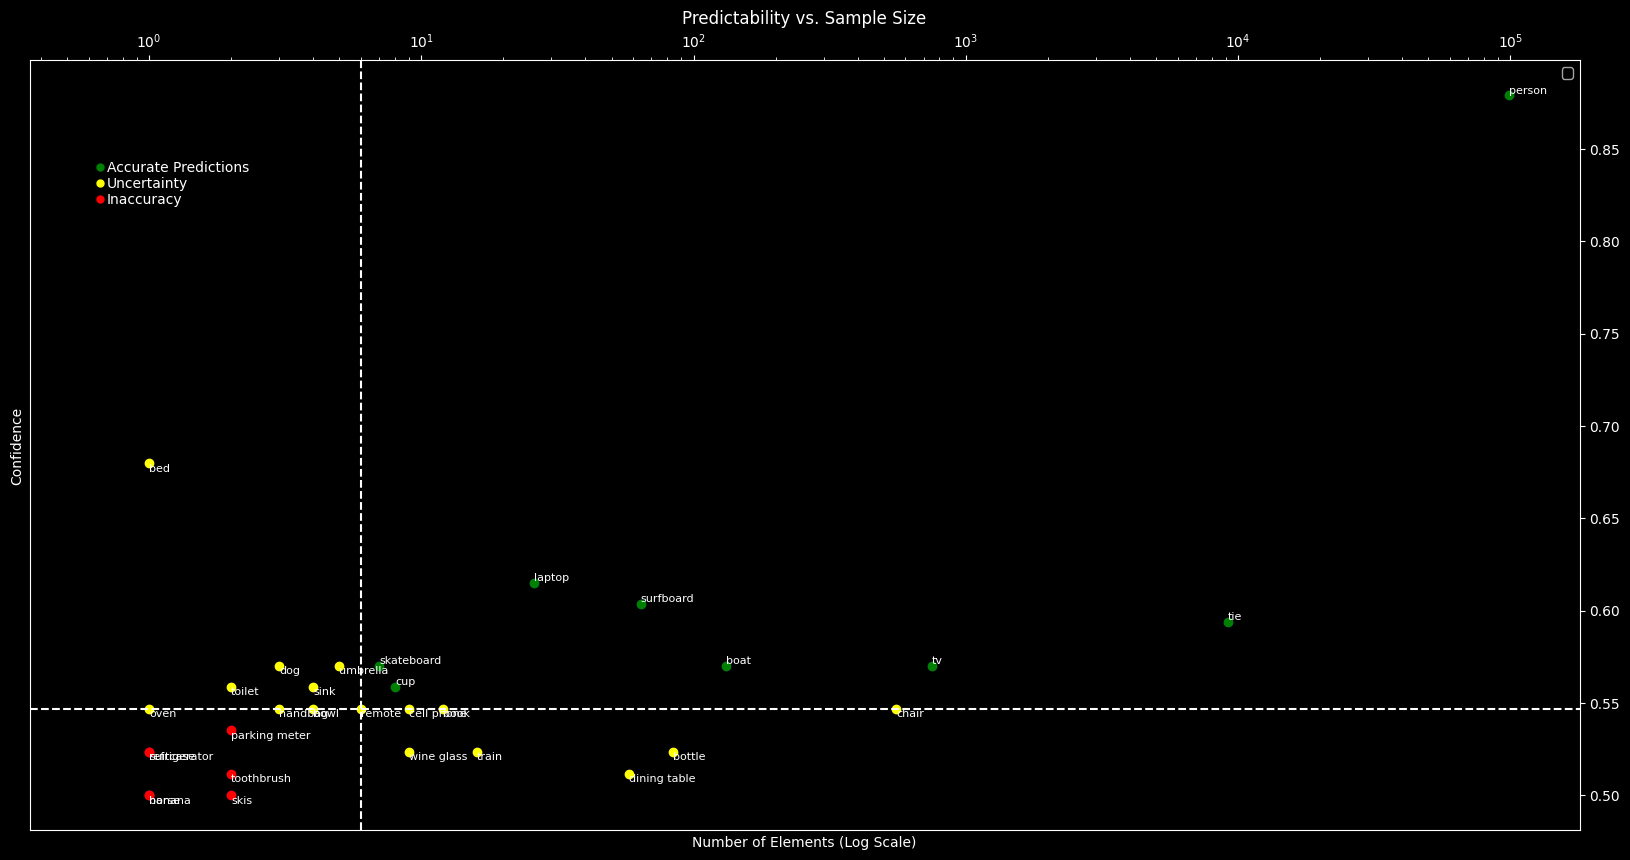

In [8]:
middle_point = np.median(num_elements)

# Calculate the median confidence level
median_confidence_level = np.median(median_confidences)



plt.style.use('dark_background')

# Plot the graph with log scale on the x-axis
plt.figure(figsize=(20, 10))
plt.scatter(num_elements, median_confidences, color='blue', alpha=0.5)
plt.axvline(x=middle_point, color='white', linestyle='--')
plt.axhline(y=median_confidence_level, color='white', linestyle='--')
plt.xlabel('Number of Elements (Log Scale)')
plt.ylabel('Confidence')
plt.title('Predictability vs. Sample Size')
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.legend()

# Get the coordinates of the median lines
x_median_line = middle_point
y_median_line = median_confidence_level

# Color points based on their quadrant and label them with class labels
for x, y, label in zip(num_elements, median_confidences, class_labels):
    if x > x_median_line and y > y_median_line:  # Second quadrant
        plt.scatter(x, y, color='green')
        plt.text(x, y, label, fontsize=8, ha='left', va='bottom')
    elif x < x_median_line and y < y_median_line:  # Fourth quadrant
        plt.scatter(x, y, color='red')
        plt.text(x, y, label, fontsize=8, ha='left', va='top')
    else:
        plt.scatter(x, y, color='yellow')
        plt.text(x, y, label, fontsize=8, ha='left', va='top')

circle_x = 0.66  # X-coordinate of the circle
circle_y = 0.84   # Y-coordinate of the circle
plt.scatter(circle_x, circle_y, color='green', marker='o', s=25)

circle_x = 0.66  # X-coordinate of the circle
circle_y = 0.8315   # Y-coordinate of the circle
plt.scatter(circle_x, circle_y, color='yellow', marker='o', s=25) 

circle_x = 0.66  # X-coordinate of the circle
circle_y = 0.823   # Y-coordinate of the circle
plt.scatter(circle_x, circle_y, color='red', marker='o', s=25) 
combined_label = 'Accurate Predictions\nUncertainty\nInaccuracy'
plt.text(0.70, 0.82, combined_label, fontsize=10, color='white')

# Move the x-axis and y-axis to the right
plt.gca().yaxis.set_ticks_position('right')
plt.gca().xaxis.set_ticks_position('top')

plt.show()

Object Heat Map

In [10]:
import numpy as np
import matplotlib.pyplot as plt

parent_dir = ".."  # Adjust this according to your directory structure

# Create a directory path to store the heatmap images
heatmap_dir = os.path.join(parent_dir, "heatmap_images")

# Create the directory to store the heatmap images
os.makedirs(heatmap_dir, exist_ok=True)

# Assuming 'data' is a DataFrame containing detected objects similar to the 'fer' column in the example
for pklfile in pklfiles:
    # Read the data from the pickle file
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))
    data = data.sort_values(by='filename')

    # Initialize the heatmap array
    heatmap = np.zeros((720, 1280))

    # Loop through the DataFrame and increment the heatmap values at the object positions
    print("\n\n\n***********HEATMAP*************")
    for i in range(data.shape[0]):
        for detection in data.iloc[i]['detections']:
            # Extract the bounding box coordinates of the detected object
            x_start, y_start, width, height = detection[:4]
            x_end = x_start + width
            y_end = y_start + height

            # Increment the heatmap cells corresponding to the bounding box
            heatmap[y_start:y_end, x_start:x_end] += 1

    # Plot and save the heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap, cmap='hot')  # Overlay the heatmap with transparency
    plt.title("Heatmap of Detected Objects in the Video")
    plt.xlabel("Frame Width (pixels)")
    plt.ylabel("Frame Height (pixels)")
    plt.savefig(os.path.join(heatmap_dir, f"{pklfile}_heatmap.png"))
    plt.close()




***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************



***********HEATMAP*************
